In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import calendar

pd.set_option('display.max_columns', None) #mostrar todas as colunas
pd.set_option('display.max_rows', 50)  #mostrar no max 50 linhas
pd.set_option('display.max_colwidth', None)  #mostrar a grossura máxima das colunas

In [50]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

In [2]:
df = pd.read_excel('fake_dataset.xlsx')
df.to_csv('fake_dataset.csv')
df = pd.read_csv("fake_dataset.csv")
df = df.drop(columns =['Unnamed: 0','Unnamed: 0.1']) #ele cria essas colunas

In [3]:
df.shape

(700, 23)

In [4]:
df.head(2)

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
0,2022-08-01,LGPKG-1090219,2710823,Aéreo de São Paulo,Aéreo para Fortaleza | Quarto Duplo ou Triplo | 7 Diárias (3 diárias em Fortaleza + 4 diárias em Jericoacoara).,Pacote de Viagem - Fortaleza + Jericoacoara - 2022,NAC,False,2022.0,Data flexível,Jericoacoara,Ceará,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",675.0,117.0,3470,660,1239,2891,0,2891,1
1,2022-08-01,LGPKG-1095820,2724406,Aéreo de Rio de Janeiro - 3 diárias + Ingresso 1 dia,"Aéreo para Florianópolis, Navegantes ou Joinville | 3 diárias em Balneário Camboriú em Quarto Duplo ou Triplo | Ingresso de 1 dia para o Parque Beto Carrero World.",Pacote de Viagem - Beto Carrero World - Segundo Semestre - 2023,NAC,False,2023.0,Data flexível,Balneário Camboriú,Santa Catarina,Brasil,"Hospedagem Econômica,Café da manhã,Ingresso,Passagem Aérea Econômica",2010.0,443.0,624,125,0,749,0,749,1


In [5]:
## Testing the idea on calculating mean sales and mean price for an especific id

In [9]:
df1 = df[df['offer_option_id']==2782430]
df1

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
167,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,0,559,140
168,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,42,601,1
169,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,53,612,8
171,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,64,623,9
173,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,224,783,1
653,2022-08-02,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",8704.0,2654.0,699,0,140,559,0,559,102
654,2022-08-02,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",8704.0,2654.0,699,0,140,559,42,601,1
656,2022-08-02,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",8704.0,2654.0,699,0,140,559,53,612,8
658,2022-08-02,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",8704.0,2654.0,699,0,140,559,61,620,1
659,2022-08-02,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data

In [20]:
mean_sales1 = df1['sales'].mean()
mean_price1 = df1['totalprice'].mean()

In [19]:
df2 = df[df['offer_option_id']==2780997]

In [21]:
mean_sales2 = df2['sales'].mean()
mean_price2 = df2['totalprice'].mean()

In [22]:
new_df = pd.DataFrame({'off_id': [2782430, 2780997], 'mean_sales': [mean_sales1, mean_sales2], 'mean_price': [mean_price1, mean_price2] })

In [24]:
new_df

,off_id,mean_sales,mean_price
0,2782430,22.0,667.307692
1,2780997,4.6,1850.800000


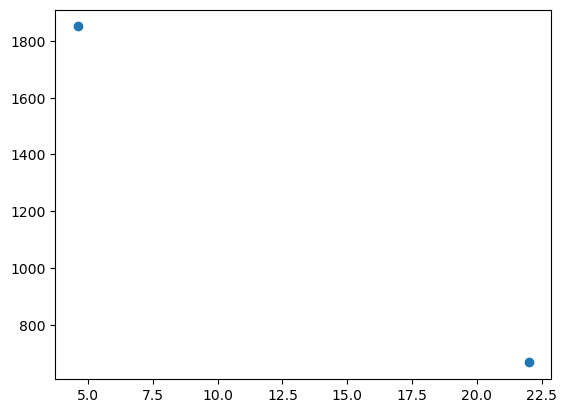

In [25]:
plt.scatter(new_df['mean_sales'], new_df['mean_price'])

In [29]:
ids = list(df['offer_option_id'].unique())

In [30]:
mean_sales = []
mean_price = []
for i in ids:
    df1 = df[df['offer_option_id']== i]
    mean_sales1 = df1['sales'].mean()
    mean_price1 = df1['totalprice'].mean()
    mean_sales.append(mean_sales1)
    mean_price.append(mean_price1)
    
new_df = pd.DataFrame({'off_id': ids, 'mean_sales': mean_sales, 'mean_price': mean_price})

In [31]:
new_df

,off_id,mean_sales,mean_price
0,2710823,1.00,2891.000
1,2724406,6.75,670.625
2,2724407,2.60,658.000
3,2724409,1.25,931.250
4,2724408,6.00,1000.000
...,...,...,...
321,2782947,1.00,653.000
322,2782946,1.00,1037.000
323,2782950,1.00,1235.000
324,2783453,1.00,631.000


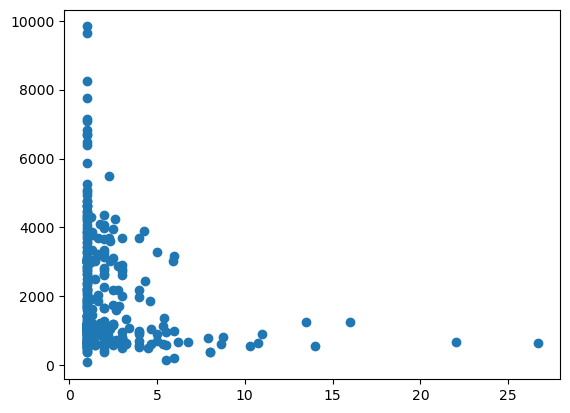

In [32]:
plt.scatter(new_df['mean_sales'], new_df['mean_price'])

In [35]:
X = new_df.iloc[:, 1:]

In [38]:
X.head(5)

,mean_sales,mean_price
0,1.00,2891.000
1,6.75,670.625
2,2.60,658.000
3,1.25,931.250
4,6.00,1000.000


In [39]:
n_clusters = 2
km_2 = KMeans(n_clusters=n_clusters, n_init=20)
km_2.fit(X)

n_clusters = 3
km_3 = KMeans(n_clusters=n_clusters, n_init=20)
km_3.fit(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=20)

In [43]:
print(km_2.labels_)

[1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0]


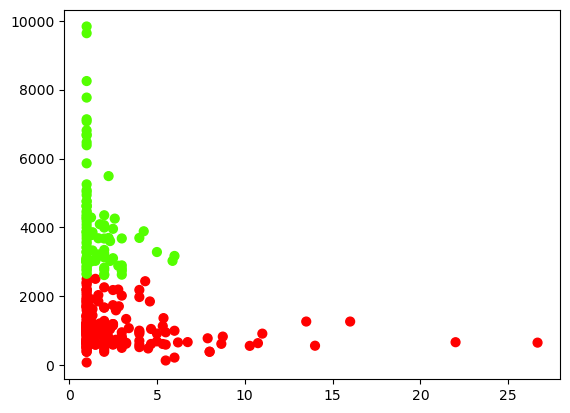

In [48]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=40, c=km_2.labels_, cmap=plt.cm.prism)

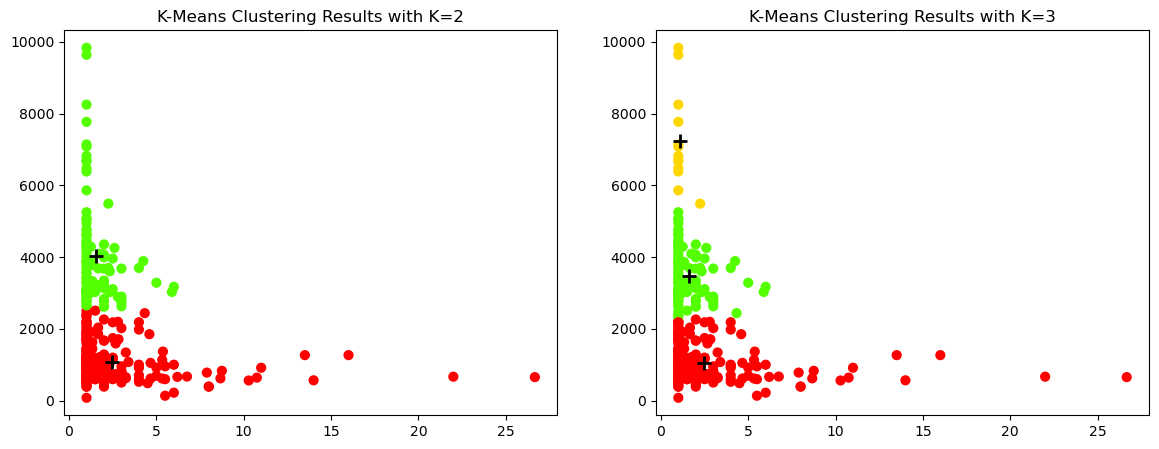

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X.iloc[:,0], X.iloc[:,1], s=40, c=km_2.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X.iloc[:,0], X.iloc[:,1], s=40, c=km_3.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
plt.show()

In [59]:
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(km_3.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = X.loc[km_3.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(km_3.labels_ == iclust)[0]

    cluster_cen = km_3.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(X.loc[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    #print('closest point to cluster center: ', cluster_pts[min_idx])
    #print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    #print('  ', X.loc[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [146]:
print(km_3.labels_)

[2 0 0 0 0 1 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 1 2 2 2
 2 2 1 2 2 0 0 2 1 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 0 2 0 0 0 0 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 0 2 0 0 0 0 0 0 2 0 2 2 0 0 2 2 2 1 1 2 2 2 2 2 2 1 1 2 1 0 2
 2 0 0 2 1 0 0 2 2 2 1 2 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 0 0 0]


In [147]:
new_df.loc[0,:]

off_id        2710823.0
mean_sales          1.0
mean_price       2891.0
Name: 0, dtype: float64

In [148]:
new_df['cluster_number'] = km_3.labels_

In [150]:
new_df[new_df['cluster_number']==2]

,off_id,mean_sales,mean_price,cluster_number
0,2710823,1.000000,2891.0,2
12,2769026,1.000000,2394.0,2
13,2772076,1.250000,4289.0,2
14,2772746,1.000000,2816.5,2
15,2772749,1.000000,3840.0,2
...,...,...,...,...
311,2781873,1.000000,2771.0,2
312,2781881,1.000000,3079.0,2
313,2782148,2.000000,3244.0,2
317,2782674,1.000000,3303.0,2


In [161]:
df[df['offer_option_id']==2772076]# q tem mean price 4289

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
20,2022-08-01,LGPKG-1135137,2772076,Aéreo de São Paulo - 5 diárias,"Aéreo para Las Vegas | 5 Diárias em Quarto Duplo, Triplo ou Quádruplo.",Pacote de Viagem - Las Vegas - 2023,INT,False,2023.0,Data flexível,Las Vegas,Nevada,Estados Unidos,"Passagem Aérea Econômica,Hospedagem Econômica",257.0,64.0,3436,619,811,3244,0,3244,2
21,2022-08-01,LGPKG-1135137,2772076,Aéreo de São Paulo - 5 diárias,"Aéreo para Las Vegas | 5 Diárias em Quarto Duplo, Triplo ou Quádruplo.",Pacote de Viagem - Las Vegas - 2023,INT,False,2023.0,Data flexível,Las Vegas,Nevada,Estados Unidos,"Passagem Aérea Econômica,Hospedagem Econômica",257.0,64.0,3436,619,811,3244,2076,5320,1
22,2022-08-01,LGPKG-1135137,2772076,Aéreo de São Paulo - 5 diárias,"Aéreo para Las Vegas | 5 Diárias em Quarto Duplo, Triplo ou Quádruplo.",Pacote de Viagem - Las Vegas - 2023,INT,False,2023.0,Data flexível,Las Vegas,Nevada,Estados Unidos,"Passagem Aérea Econômica,Hospedagem Econômica",257.0,64.0,3436,619,811,3244,2076,5321,1
520,2022-08-02,LGPKG-1135137,2772076,Aéreo de São Paulo - 5 diárias,"Aéreo para Las Vegas | 5 Diárias em Quarto Duplo, Triplo ou Quádruplo.",Pacote de Viagem - Las Vegas - 2023,INT,False,2023.0,Data flexível,Las Vegas,Nevada,Estados Unidos,"Passagem Aérea Econômica,Hospedagem Econômica",244.0,52.0,3436,653,818,3271,0,3271,1


In [163]:
df[df['offer_option_id']==2782675]# q tem mean price 3331

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
681,2022-08-02,LGPKG-1141875,2782675,Aéreo de São Paulo,Aéreo para Los Angeles | 5 Diárias em Quarto Duplo ou Triplo,Pacote de Viagem - Los Angeles (Califórnia) - 2023,INT,False,2023.0,Data flexível,Los Angeles,Califórnia,Estados Unidos,"Hospedagem Econômica,Passagem Aérea Econômica",265.0,54.0,3499,630,826,3303,0,3303,2
682,2022-08-02,LGPKG-1141875,2782675,Aéreo de São Paulo,Aéreo para Los Angeles | 5 Diárias em Quarto Duplo ou Triplo,Pacote de Viagem - Los Angeles (Califórnia) - 2023,INT,False,2023.0,Data flexível,Los Angeles,Califórnia,Estados Unidos,"Hospedagem Econômica,Passagem Aérea Econômica",265.0,54.0,3499,665,833,3331,0,3331,1
683,2022-08-02,LGPKG-1141875,2782675,Aéreo de São Paulo,Aéreo para Los Angeles | 5 Diárias em Quarto Duplo ou Triplo,Pacote de Viagem - Los Angeles (Califórnia) - 2023,INT,False,2023.0,Data flexível,Los Angeles,Califórnia,Estados Unidos,"Hospedagem Econômica,Passagem Aérea Econômica",265.0,54.0,3499,700,840,3359,0,3359,1


In [61]:
km_3.n_clusters

3

In [60]:
closest_pt_idx

[49, 22, 179]

In [89]:
c = new_df.loc[49,:]

In [83]:
b = new_df.loc[22,:]

In [114]:
a = new_df.loc[179,:]
a

off_id        3003906.0
mean_sales          1.0
mean_price       3535.0
Name: 179, dtype: float64

In [81]:
a[2]

3535.0

In [76]:
a[1]

1.0

In [78]:
plt.scatter?

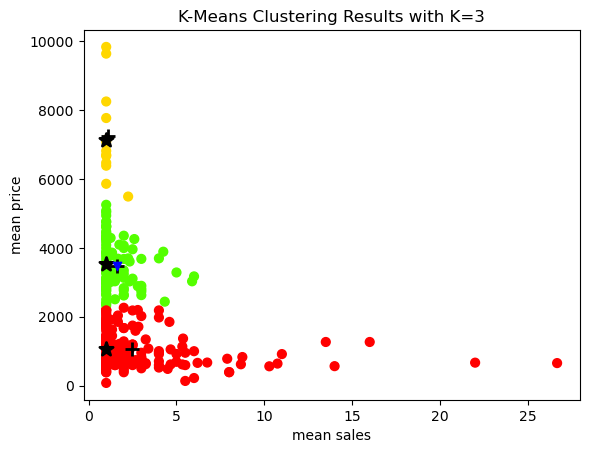

In [126]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=40, c=km_3.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.xlabel('mean sales')
plt.ylabel('mean price')
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
plt.scatter(a[1], a[2], marker='*', s=100, c='k', linewidth=2) #verde
plt.scatter(b[1], b[2], marker='*', s=100, c='k', linewidth=2) #amarelo
plt.scatter(c[1], c[2], marker='*', s=100, c='k', linewidth=2) #vermelho
plt.scatter(u3[0], u3[1], marker = 'v', c ='b')#centro do cluster verde
plt.show()

In [ ]:
#Agora eu quero saber quem são os ids respectivos
#Primeiro no cluster verde


In [94]:
df[df['offer_option_id']==3003906]['product_name']

319    Pacote de Viagem - Grécia (Atenas + Santorini) - 2024
320    Pacote de Viagem - Grécia (Atenas + Santorini) - 2024
Name: product_name, dtype: object

In [105]:
km_3.cluster_centers_

array([[2.49263325e+00, 1.05303137e+03],
       [1.09615385e+00, 7.23819231e+03],
       [1.63286550e+00, 3.47960146e+03]])

In [109]:
centro1_x = km_3.cluster_centers_[0,0] ##coordenada x 
centro1_y = km_3.cluster_centers_[0,1] ##coordenada y

In [110]:
centro1_y

1053.0313735703667

In [107]:
centro1_x

2.4926332459589355

In [113]:
u = [centro1_x, centro1_y]

In [123]:
u2 = [km_3.cluster_centers_[1,0], km_3.cluster_centers_[1,1]]# centro do cluster amarelo

In [124]:
u3 = [km_3.cluster_centers_[2,0], km_3.cluster_centers_[2,1]]# centro do cluster verde

In [128]:
type(km_3.cluster_centers_[2,1])

numpy.float64

In [141]:
#new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison')]
novo = new_df.loc[(new_df['mean_sales']==u3[0]) & (new_df['mean_price']==u3[1])]

In [143]:
#O centro do cluster não é um ponto do dataframe!!!!!!!
novo

,off_id,mean_sales,mean_price


In [144]:
Y = pd.DataFrame(min_idx, index=new_df.index, columns=['Center_euclidean_dist'])
Z = pd.DataFrame(km_3, index=new_df.index, columns=['cluster_ID'])
PAP = pd.concat([Y,Z], axis=1)
grouped = PAP.groupby(['cluster_ID'])
grouped.idxmin()

,Center_euclidean_dist
cluster_ID,
"KMeans(n_clusters=3, n_init=20)",0


In [145]:
PAP

,Center_euclidean_dist,cluster_ID
0,45,"KMeans(n_clusters=3, n_init=20)"
1,45,"KMeans(n_clusters=3, n_init=20)"
2,45,"KMeans(n_clusters=3, n_init=20)"
3,45,"KMeans(n_clusters=3, n_init=20)"
4,45,"KMeans(n_clusters=3, n_init=20)"
...,...,...
321,45,"KMeans(n_clusters=3, n_init=20)"
322,45,"KMeans(n_clusters=3, n_init=20)"
323,45,"KMeans(n_clusters=3, n_init=20)"
324,45,"KMeans(n_clusters=3, n_init=20)"


In [140]:
new_df[new_df['mean_price']==u3[0]]

,off_id,mean_sales,mean_price


In [135]:
novo

,off_id,mean_sales,mean_price


In [98]:
KMeans.cluster_centers_?

Object `KMeans.cluster_centers_` not found.


In [16]:
## I'm trying to answer the following question: how sales behave with day week? Which day sales the most?

In [34]:
#Add column with the day of the week
week_day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    week_day.append(date.day_name())
df['Week day'] = week_day

In [21]:
#No fake_dataset só tem segundas e tercas:
df['Week day'].value_counts()

Monday     499
Tuesday    201
Name: Week day, dtype: int64

<Axes: ylabel='sales'>

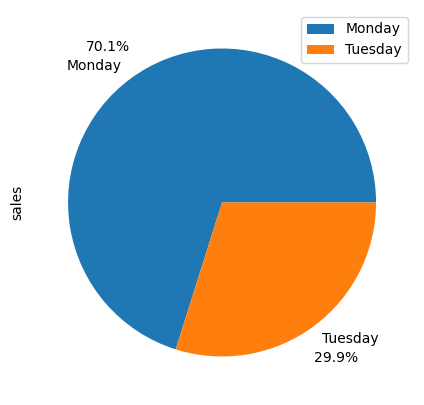

In [33]:
t = df.groupby(['Week day']).sum(['sales'])
plot2 = t.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot2

In [51]:
## I'm trying to answer the following question: how sales behave with day of month? Which day sales the most?

In [48]:
#Add column with days
day = []
for i in range (df.shape[0]): 
    date = pd.Timestamp(df.iloc[i,0])
    day.append(date.to_pydatetime().day)
df['day'] = day

<Axes: ylabel='sales'>

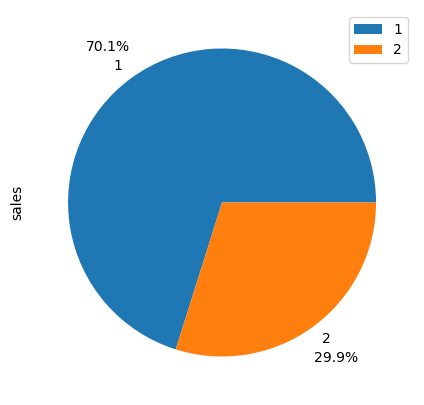

In [50]:
u = df.groupby(['day']).sum(['sales'])
plot1 = u.plot.pie(y='sales', figsize=(5, 5), autopct='%1.1f%%', pctdistance=1.25)
plot1

In [74]:
u = dict(df['destination_type'].value_counts())

In [75]:
#Group by destination_type and sum the column sales
i = dict(df.groupby('destination_type').sum()['sales'])

C:\Users\user\AppData\Local\Temp\ipykernel_13560\58718615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  i = dict(df.groupby('destination_type').sum()['sales'])


In [76]:
i

{'INT': 790, 'NAC': 1671}

In [78]:
total_sales = df['sales'].sum()

In [82]:
prop_sales_nac = list(i.values())[1]/total_sales
prop_sales_int = list(i.values())[0]/total_sales

In [80]:
i.values()

dict_values([790, 1671])

In [83]:
prop_sales_int

0.321007720438846

In [84]:
prop_sales_nac

0.678992279561154

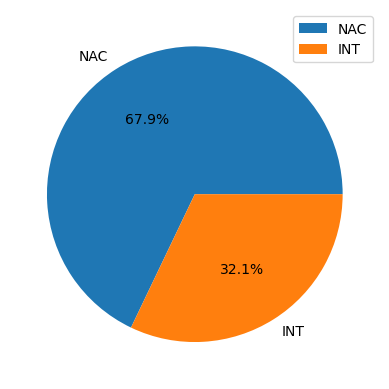

In [96]:
prop_sales = [prop_sales_nac, prop_sales_int]
labels = ["NAC", "INT"]
plt.pie(prop_sales, autopct='%1.1f%%', labels = labels)
plt.legend()
plt.show()

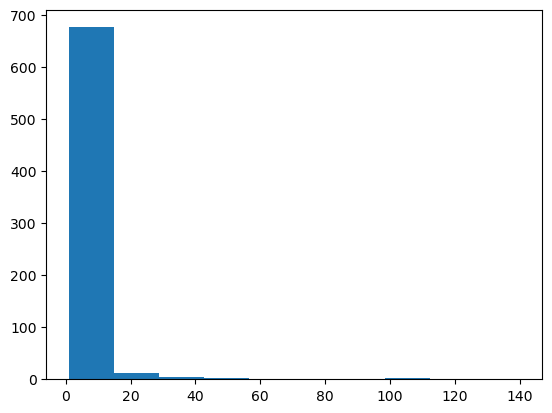

In [109]:
plt.hist(df['sales'], bins = 10)
plt.show()

In [111]:
#Reding the rows which name contains mega
df2 = df.loc[df['product_name'].str.contains('All')]

In [112]:
df2.shape

(47, 26)

In [114]:
## Em torno de 3% das vendas é de pacotes all inclusive:
df2['sales'].sum()/total_sales

0.03941487200325071

In [115]:
## O QUE FALTA: ENTENDER A DISTRIBUIÇÃO DISSO!

In [ ]:
## I'm trying to understand: given an id, whats the range of realprice?

In [14]:
df3 = df[df['offer_option_id']==2782430]

In [39]:
df3.shape

(13, 23)

In [15]:
df3.head(5)

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
167,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,0,559,140
168,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,42,601,1
169,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,53,612,8
171,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,64,623,9
173,2022-08-01,LGPKG-1141722,2782430,Aéreo de São Paulo - 6 diárias,Aéreo para Recife | Quarto Duplo ou Triplo | 6 Diárias (3 diárias em Recife + 3 diárias em Porto de Galinhas),Pacote de Viagem Recife + Porto de Galinhas - 2023,NAC,False,2023.0,Data flexível,Recife,Pernambuco,Brasil,"Hospedagem Econômica,Café da manhã,Passagem Aérea Econômica",14741.0,4610.0,699,0,140,559,224,783,1


In [31]:
o = dict(df['offer_option_id'].value_counts())

In [37]:
len(o)

326

In [19]:
price_var = df3['totalprice'].max() - df3['totalprice'].min()

In [21]:
total_sales = df3['sales'].sum()

In [63]:
ids = list(o.keys())
ids

[2782430,
 2780997,
 2779137,
 2782432,
 2782429,
 2780573,
 2777664,
 2777019,
 2724406,
 2777663,
 3042323,
 2781871,
 2898800,
 2777948,
 2782617,
 2777020,
 2785538,
 3034930,
 2780996,
 2724407,
 2780572,
 2779874,
 2777665,
 2779873,
 2780197,
 2989050,
 2782618,
 3030560,
 2782433,
 2781870,
 3030564,
 2779861,
 2724409,
 2782944,
 2782943,
 2779315,
 2773088,
 2776312,
 2989049,
 3035914,
 2769024,
 2777018,
 3003947,
 3035863,
 2776984,
 3035644,
 3034931,
 2898801,
 2776691,
 3034927,
 2772076,
 3035645,
 3003910,
 2782675,
 2782582,
 2989053,
 2989041,
 2724408,
 2989054,
 2780308,
 2780309,
 2989045,
 2989046,
 2779316,
 2777947,
 2777668,
 2776983,
 3033392,
 2779136,
 2777021,
 3034932,
 3032675,
 3031382,
 2776185,
 3030565,
 2777666,
 2780476,
 2777667,
 2785537,
 2782431,
 3042324,
 2778975,
 2778976,
 2776186,
 2785783,
 2786346,
 2786345,
 3035894,
 2786343,
 2786550,
 2786551,
 2897079,
 3043794,
 3035991,
 3035992,
 3035981,
 3043793,
 3032847,
 3031530,
 3031383,


In [67]:
price_var = []
total_sales = []
for i in ids:
    df4 = df[df['offer_option_id'] == i]
    price_var4 = df4['totalprice'].max() - df4['totalprice'].min()
    total_sales4 = df4['sales'].sum()
    price_var.append(price_var4)
    total_sales.append(total_sales4)

In [74]:
novo_df = pd.DataFrame({'offer_id': ids, 'total_sales' : total_sales, 'price_var' : price_var})

In [75]:
novo_df.head()

,offer_id,total_sales,price_var
0,2782430,286,358
1,2780997,46,700
2,2779137,16,515
3,2782432,71,414
4,2782429,240,358


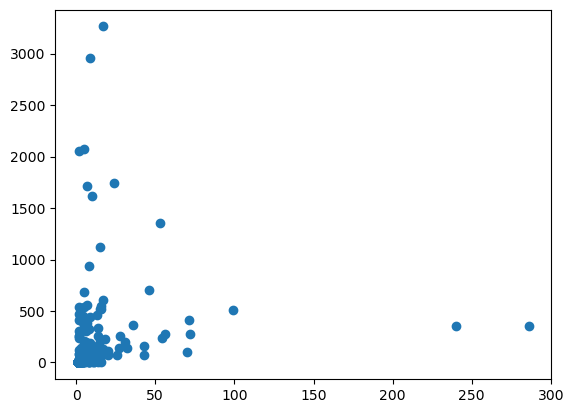

In [77]:
plt.scatter(novo_df['total_sales'], novo_df['price_var'])

In [62]:
novo_df.head(5)

,price_var,total_sales
2782430,0,1
2780997,0,1
2779137,0,1
2782432,0,1
2782429,0,1


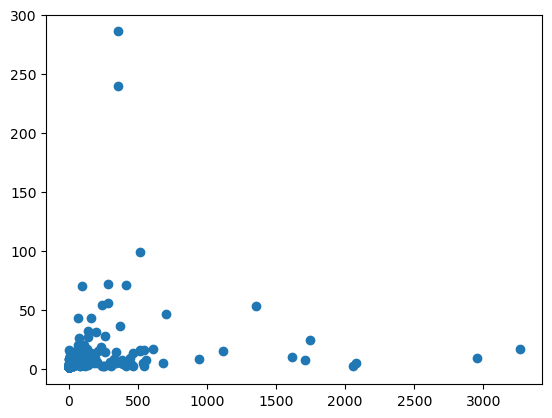

In [78]:
plt.scatter(novo_df['price_var'],novo_df['total_sales'])